### Dataset

- Train set: `Id [570 - 952]`
- Test set: `Id [0 - 569]`

### Step 1
- data cleaning
- [Categorise the geographical position using  latitude & longitude](#geographic)
- BIC
- [Statistical Imputation](#stats_impulation)
- [Normalization](#normalization)
- [Standardization](#standardization)

### Step 2
- subset selection
- KNN regression

## Import data and libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # this is to clear the warnings from this page, typically you would leave them on

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir())

# Any results you write to the current directory are saved as output.

['.DS_Store', 'sampleSubmission.csv', 'test.csv', 'train.csv', '.ipynb_checkpoints', 'Boosting and Stacking.ipynb', '.git', 'extracted_location.csv', 'Exploratory Data Analysis.ipynb']


In [2]:
# Load data; set 'Id' as index column
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print("Train Data: {}" .format(train_data.shape))
print("Test Data: {}" .format(test_data.shape))

Train Data: (383, 30)
Test Data: (570, 29)


In [3]:
train_data.tail()

,Id,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
378,948,280,f,1,f,-33.798607,151.278883,Apartment,Entire home/apt,4,...,4.0,4.0,8.0,6.0,6.0,4.0,f,f,strict,1.00
379,949,107,f,1,f,-33.772869,151.280911,Apartment,Entire home/apt,3,...,NaN,10.0,NaN,10.0,NaN,NaN,f,f,flexible,0.04
380,950,134,f,1,f,-33.798554,151.284343,Apartment,Entire home/apt,4,...,10.0,9.0,10.0,10.0,10.0,8.0,t,f,strict,3.39
381,951,66,f,1,f,-33.761593,151.265605,Apartment,Entire home/apt,3,...,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,0.04
382,952,119,f,1,f,-33.796089,151.278142,Apartment,Entire home/apt,4,...,NaN,NaN,NaN,NaN,NaN,NaN,t,f,flexible,NaN


## Descriptve Statistics

In [4]:
# Check the missing data: the counts show the numbers of missing value in each attribute
print('\n=== Train data ===')
print(train_data.isnull().sum())
print('\n=== Test data ===')
print(test_data.isnull().sum())


=== Train data ===
Id                               0
price                            0
host_is_superhost                0
host_total_listings_count        0
host_identity_verified           0
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                        0
bedrooms                         0
beds                             0
security_deposit               160
cleaning_fee                   119
extra_people                     0
minimum_nights                   0
maximum_nights                   0
number_of_reviews                0
review_scores_rating           128
review_scores_accuracy         129
review_scores_cleanliness      128
review_scores_checkin          129
review_scores_communication    128
review_scores_location         129
review_scores_value            129
instant_bookable                 0
is_business_travel_ready         0


In [5]:
train_data.describe().round(2)

,Id,price,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,security_deposit,...,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,383.00,383.00,383.00,383.00,383.00,383.00,383.00,383.00,383.00,223.00,...,383.00,383.00,255.00,254.00,255.00,254.00,255.00,254.00,254.00,263.00
mean,761.00,187.95,4.97,-33.75,151.29,3.86,1.34,1.85,2.30,496.74,...,601.01,7.48,93.98,9.49,9.24,9.81,9.85,9.71,9.28,0.95
std,110.71,101.09,23.13,0.06,0.02,2.70,0.59,1.03,1.44,563.02,...,543.67,14.85,8.60,0.96,1.28,0.59,0.49,0.71,1.07,1.10
min,570.00,39.00,1.00,-33.81,151.20,1.00,0.00,0.00,0.00,0.00,...,2.00,0.00,40.00,4.00,2.00,6.00,6.00,6.00,4.00,0.02
25%,665.50,100.00,1.00,-33.80,151.28,2.00,1.00,1.00,1.00,200.00,...,28.00,0.00,91.00,9.00,9.00,10.00,10.00,10.00,9.00,0.16
50%,761.00,165.00,1.00,-33.78,151.29,4.00,1.00,2.00,2.00,400.00,...,1125.00,2.00,97.00,10.00,10.00,10.00,10.00,10.00,10.00,0.53
75%,856.50,250.00,2.00,-33.72,151.29,5.00,1.50,2.00,3.00,500.00,...,1125.00,8.00,100.00,10.00,10.00,10.00,10.00,10.00,10.00,1.17
max,952.00,435.00,198.00,-33.59,151.34,40.00,4.50,5.00,11.00,4000.00,...,1126.00,96.00,100.00,10.00,10.00,10.00,10.00,10.00,10.00,5.59


In [6]:
# Check categorial features
train_data.dtypes[train_data.dtypes == 'object']

host_is_superhost           object
host_identity_verified      object
property_type               object
room_type                   object
instant_bookable            object
is_business_travel_ready    object
cancellation_policy         object
dtype: object

In [7]:
def check_categorial(col_name):
    print('\n=== Train data ===')
    print(train_data[col_name].value_counts())
    print('\n=== Test data ===')
    print(test_data[col_name].value_counts())
    
# Analyse types of each categorial features
for col in train_data.columns[train_data.dtypes == 'object']:
    check_categorial(col)


=== Train data ===
f    340
t     43
Name: host_is_superhost, dtype: int64

=== Test data ===
f    509
t     61
Name: host_is_superhost, dtype: int64

=== Train data ===
f    205
t    178
Name: host_identity_verified, dtype: int64

=== Test data ===
f    315
t    255
Name: host_identity_verified, dtype: int64

=== Train data ===
Apartment          228
House              119
Townhouse           10
Guesthouse           6
Vacation home        4
Other                3
Bed & Breakfast      3
Cabin                2
Guest suite          2
Villa                2
Condominium          2
Boutique hotel       1
Bungalow             1
Name: property_type, dtype: int64

=== Test data ===
Apartment          350
House              159
Townhouse           12
Bed & Breakfast     10
Guesthouse           7
Cabin                6
Other                5
Bungalow             4
Guest suite          4
Vacation home        3
Villa                3
Camper/RV            1
Condominium          1
Yurt             

In [8]:
# Create a data copy to prevent the original data from being changed
train = train_data.copy()
test = test_data.copy()

## EDA (using train set)

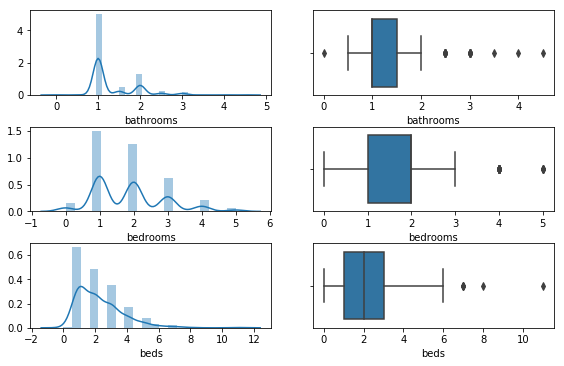

In [9]:
cols = ['bathrooms', 'bedrooms', 'beds']
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(8,5))
fig.tight_layout()
for i in range(len(cols)):
    sns.distplot(train[cols[i]], ax=axes[i,0])
    sns.boxplot(train[cols[i]], ax=axes[i,1])
fig.show()

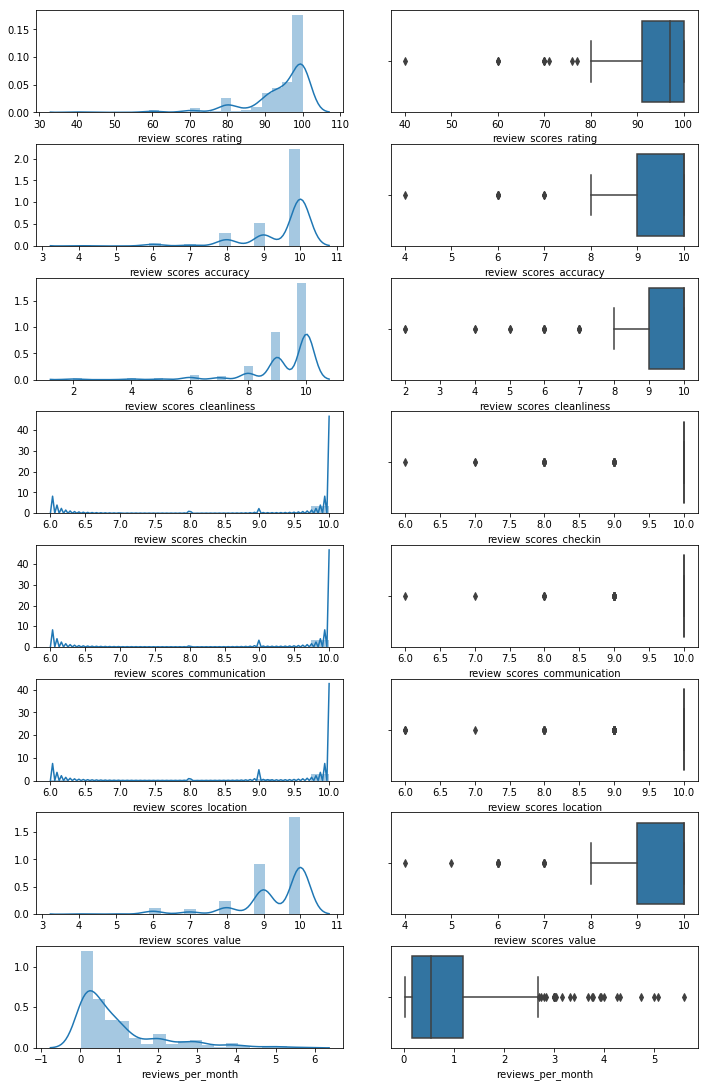

In [10]:
cols = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
        'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(10,15))
fig.tight_layout()
total = len(cols)
for i in range(total):
    col_notnull = train[pd.isnull(train[cols[i]]) == False][cols[i]]
    sns.distplot(col_notnull, ax=axes[i,0])
    sns.boxplot(col_notnull, ax=axes[i,1])
fig.show()

<a id="stats_impulation"></a>
## Statistical impulation

- `security_deposit`: NaN -> 0
- `cleaning_fee`: NaN -> 0
- `bathrooms`: NaN -> **median**  (reason: bathrooms is categorical; distribution of bathrooms is right-skewed)

In [13]:
# Statistical imputation - fill NaN by 0 for 'security_deposit' and 'cleaning_fee'
train['security_deposit'].fillna(0, inplace=True)
train['cleaning_fee'].fillna(0, inplace=True)
test['security_deposit'].fillna(0, inplace=True)
test['cleaning_fee'].fillna(0, inplace=True)

# Statistical imputation - bathrooms is categorical; distribution of bathrooms is right-skewed
test['bathrooms'].fillna(train['bathrooms'].median(), inplace=True)

In [14]:
# Statistical imputation
cols = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
        'review_scores_communication', 'review_scores_location', 'review_scores_value']

for col in cols:
    train[col].fillna(train[col].median(), inplace=True)
    test[col].fillna(train[col].median(), inplace=True)

In [15]:
# Drop the feature 'reviews_per_month', since we don't have the months value to fill the missing data
train.drop(['reviews_per_month'], axis=1, inplace=True)
test.drop(['reviews_per_month'], axis=1, inplace=True)

## Calculate distance to Manly Beach and Westfield Shopping Center

In [16]:

train['dist_nearist_attraction'] = 0
test['dist_nearist_attraction'] = 0


import geopy.distance
manly_beach = (-33.79845, 151.28666)
westfield = (-33.76752, 151.26561)


for index, row in train.iterrows():
    coords = (row['latitude'], row['longitude'])
    dist_manly = geopy.distance.vincenty(manly_beach, coords).m
    dist_westfield = geopy.distance.vincenty(westfield, coords).m
    dist = min(dist_manly, dist_westfield)
    train.set_value(index, 'dist_nearist_attraction', dist)
    #train.set_value(index, 'dist_westfield', dist_westfield)

for index, row in test.iterrows():
    coords = (row['latitude'], row['longitude'])
    dist_manly = geopy.distance.vincenty(manly_beach, coords).m
    dist_westfield = geopy.distance.vincenty(westfield, coords).m
    dist = min(dist_manly, dist_westfield)
    test.set_value(index, 'dist_nearist_attraction', dist)
    

In [17]:
train.head()

,Id,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,dist_nearist_attraction
0,570,110,f,1,t,-33.744684,151.287888,Apartment,Entire home/apt,4,...,8.0,6.0,10.0,10.0,8.0,8.0,f,f,flexible,3267
1,571,99,t,1,f,-33.793117,151.286795,Apartment,Private room,2,...,10.0,10.0,10.0,10.0,10.0,10.0,f,f,flexible,591
2,572,70,f,1,f,-33.718033,151.298931,Apartment,Entire home/apt,4,...,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,6297
3,573,157,f,1,t,-33.802581,151.287691,Apartment,Entire home/apt,3,...,9.0,8.0,10.0,9.0,8.0,9.0,f,f,strict,468
4,574,120,f,1,f,-33.757136,151.291337,Apartment,Entire home/apt,4,...,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate,2647


In [18]:
test.head()

,Id,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,dist_nearist_attraction
0,0,f,3,t,-33.791096,151.287506,Apartment,Private room,2,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,t,f,moderate,819
1,1,f,1,t,-33.807959,151.282741,Apartment,Entire home/apt,2,1.0,...,7.0,5.0,8.0,7.0,10.0,7.0,f,f,strict,1115
2,2,f,1,f,-33.740862,151.281386,House,Private room,2,1.5,...,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,3298
3,3,f,1,f,-33.787578,151.283982,Apartment,Private room,2,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,f,f,flexible,1231
4,4,f,1,t,-33.754447,151.267175,Apartment,Entire home/apt,6,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate,1457


<a id="normalization"></a>
## Normalisation

In [19]:
# log10 norm (0-1)

cols = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
        'review_scores_checkin','review_scores_communication','review_scores_location',
        'review_scores_value']
for col in cols:
    train[col] = train[col].astype(float)
    train[col] = np.log10((train[col]))
    
for col in cols:
    test[col] = test[col].astype(float)
    test[col] = np.log10(test[col])

## Standardisation

In [20]:
def standardize_z_score(col, train_mean, train_std):
    """Z-value scaling"""
    mean = train_mean
    std = train_std
    return col.apply(lambda x: (x-mean) / std)

cols = ['host_total_listings_count','accommodates','minimum_nights','maximum_nights',
        'bathrooms','beds','bedrooms','security_deposit','cleaning_fee',
        'extra_people','number_of_reviews', 'dist_nearist_attraction']
for col in cols:
    train[col] = train[col].astype(float)
    train_mean = np.mean(train[col])
    train_std = np.std(train[col])
    train[col] = standardize_z_score(train[col], train_mean, train_std)
    test[col] = test[col].astype(float)
    test[col] = standardize_z_score(test[col], train_mean, train_std)

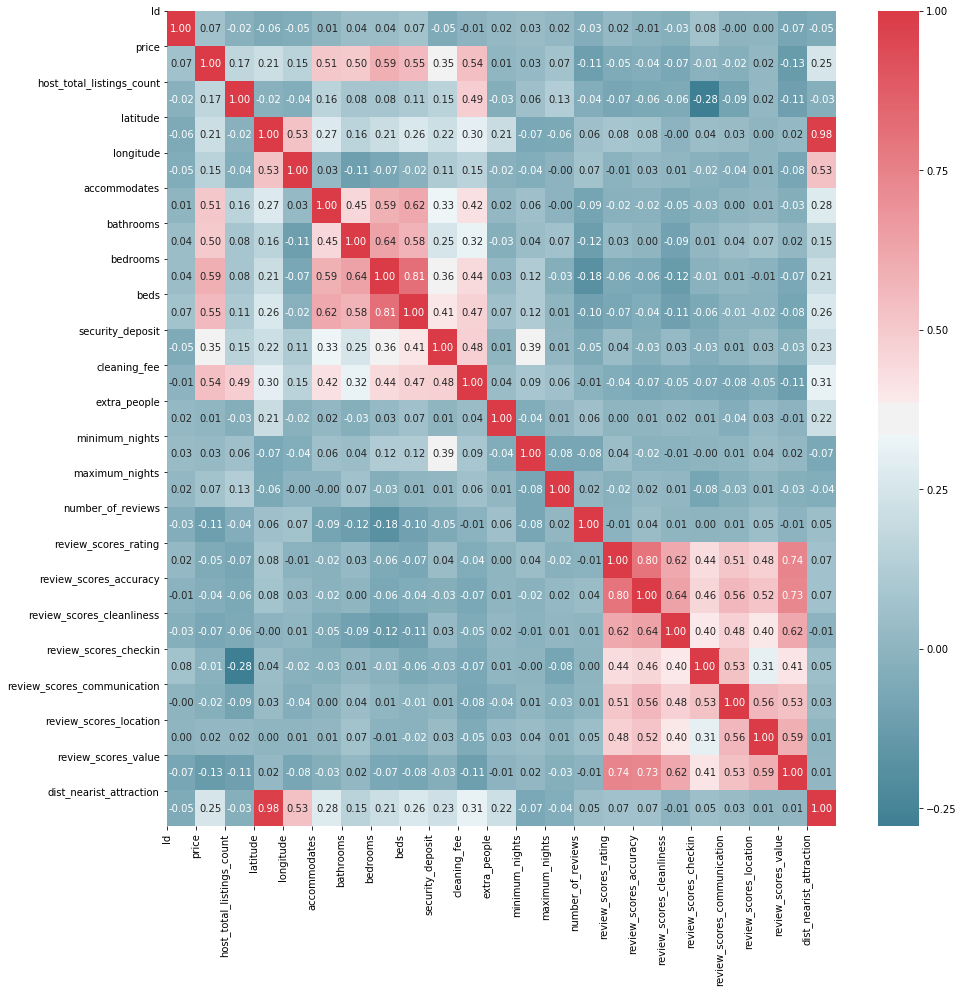

In [21]:
# ref: https://www.linkedin.com/pulse/generating-correlation-heatmaps-seaborn-python-andrew-holt
def plot_heatmap(df):
    """
    Params: df - DataFrame of our merged data
    Return: Generates a heatmap plot
    """
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(15, 15))
    #Generate Color Map, red & blue
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

# plot correlations
plot_heatmap(train)

# Categorical

In [22]:
train.head()

,Id,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,dist_nearist_attraction
0,570,110,f,-0.171807,t,-33.744684,151.287888,Apartment,Entire home/apt,0.052367,...,0.903090,0.778151,1.0,1.000000,0.90309,0.903090,f,f,flexible,-0.225345
1,571,99,t,-0.171807,f,-33.793117,151.286795,Apartment,Private room,-0.690463,...,1.000000,1.000000,1.0,1.000000,1.00000,1.000000,f,f,flexible,-0.716428
2,572,70,f,-0.171807,f,-33.718033,151.298931,Apartment,Entire home/apt,0.052367,...,1.000000,1.000000,1.0,1.000000,1.00000,1.000000,f,f,strict,0.330701
3,573,157,f,-0.171807,t,-33.802581,151.287691,Apartment,Entire home/apt,-0.319048,...,0.954243,0.903090,1.0,0.954243,0.90309,0.954243,f,f,strict,-0.739000
4,574,120,f,-0.171807,f,-33.757136,151.291337,Apartment,Entire home/apt,0.052367,...,1.000000,1.000000,1.0,1.000000,1.00000,1.000000,f,f,moderate,-0.339124


In [23]:
test.head()

,Id,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,dist_nearist_attraction
0,0,f,-0.085225,t,-33.791096,151.287506,Apartment,Private room,-0.690463,-0.577122,...,1.000000,1.00000,1.00000,1.000000,1.0,1.000000,t,f,moderate,-0.674587
1,1,f,-0.171807,t,-33.807959,151.282741,Apartment,Entire home/apt,-0.690463,-0.577122,...,0.845098,0.69897,0.90309,0.845098,1.0,0.845098,f,f,strict,-0.620267
2,2,f,-0.171807,f,-33.740862,151.281386,House,Private room,-0.690463,0.276306,...,1.000000,1.00000,1.00000,1.000000,1.0,1.000000,f,f,strict,-0.219656
3,3,f,-0.171807,f,-33.787578,151.283982,Apartment,Private room,-0.690463,-0.577122,...,1.000000,1.00000,1.00000,1.000000,1.0,1.000000,f,f,flexible,-0.598979
4,4,f,-0.171807,t,-33.754447,151.267175,Apartment,Entire home/apt,0.795197,-0.577122,...,1.000000,1.00000,1.00000,1.000000,1.0,1.000000,f,f,moderate,-0.557505


In [24]:
labels = train.iloc[:,1].copy() # column 'price'
train = train.drop(columns=['price'])
merged = pd.concat([train, test])

In [25]:
merged.head()

,Id,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,dist_nearist_attraction
0,570,f,-0.171807,t,-33.744684,151.287888,Apartment,Entire home/apt,0.052367,-0.577122,...,0.903090,0.778151,1.0,1.000000,0.90309,0.903090,f,f,flexible,-0.225345
1,571,t,-0.171807,f,-33.793117,151.286795,Apartment,Private room,-0.690463,-0.577122,...,1.000000,1.000000,1.0,1.000000,1.00000,1.000000,f,f,flexible,-0.716428
2,572,f,-0.171807,f,-33.718033,151.298931,Apartment,Entire home/apt,0.052367,-0.577122,...,1.000000,1.000000,1.0,1.000000,1.00000,1.000000,f,f,strict,0.330701
3,573,f,-0.171807,t,-33.802581,151.287691,Apartment,Entire home/apt,-0.319048,-0.577122,...,0.954243,0.903090,1.0,0.954243,0.90309,0.954243,f,f,strict,-0.739000
4,574,f,-0.171807,f,-33.757136,151.291337,Apartment,Entire home/apt,0.052367,-0.577122,...,1.000000,1.000000,1.0,1.000000,1.00000,1.000000,f,f,moderate,-0.339124


<a id="geographic"></a>
## Categorise the geographical position using  latitude & longitude

In [27]:
# Load custom location data
locations = pd.read_csv(os.path.join('extracted_location.csv'))
locations['postcode'].unique()

array([2095, 2099, 2100, 2084, 2108, 2094, 2096, 2103, 2101, 2097, 2093,
       2085, 2107, 2106, 2087, 2086, 2102, 2092, 2105, 2104])

In [28]:
merged['postcode'] = locations['postcode']

# Drop 'latitude', 'longitude'
merged.drop(['latitude', 'longitude'], axis=1, inplace=True)

In [29]:
def mapping_area(postcode):
    if postcode in [2092, 2094, 2095]:
        return 'Manly'
    elif postcode in [2093, 2085, 2086, 2087, 2096, 2097, 2099, 2100, 2101, 2084]:
        return 'Warringah'
    elif postcode in [2102,2103,2104,2105,2106,2107,2108]:
        return 'Pittwater'
    else:
        return 'ERROR'
    
merged['area'] = ''
for index, row in merged.iterrows():
    merged.set_value(index, 'area', mapping_area(row['postcode']) )

In [30]:
def mapping_property_group(property_type):
    if property_type in ['Apartment', 'House', 'Villa']:
        return property_type
    #elif property_type in ['Townhouse', 'Vacation home']:
        #return 'Group1'
    else:
        return 'Other'
    
for index, row in merged.iterrows():
    merged.set_value(index, 'property_type', mapping_property_group(row['property_type']) )

# Standardisation

## Categorise property types

## Process categorical features
    - host_is_superhost           binary
    - host_identity_verified      binary
    - property_type               multinomial
    - room_type                   multinomial
    - instant_bookable            binary
    - is_business_travel_ready    binary
    - cancellation_policy         multinomial
    - area (extracted feature)    multinomial

In [31]:
# binary
def trans_binary(val):
    if val == 'f': return 0
    elif val == 't': return 1
    else: return val

for index, row in merged.iterrows():
    merged.set_value(index, 'host_is_superhost', trans_binary(row['host_is_superhost']) )
    merged.set_value(index, 'host_identity_verified', trans_binary(row['host_identity_verified']) )
    merged.set_value(index, 'instant_bookable', trans_binary(row['instant_bookable']) )
    merged.set_value(index, 'is_business_travel_ready', trans_binary(row['is_business_travel_ready']) )
    
cols = ['host_is_superhost', 'host_identity_verified', 'instant_bookable', 'is_business_travel_ready'] 
merged[cols] = merged[cols].astype(float)

In [33]:
dummy_merged = pd.get_dummies(data=merged,
                              columns=['property_type','room_type',
                                       'cancellation_policy','area'])


In [34]:
dummy_merged.tail(20)

,Id,host_is_superhost,host_total_listings_count,host_identity_verified,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,...,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,area_Manly,area_Pittwater,area_Warringah
550,550,0.0,-0.171807,1.0,-0.690463,-0.577122,-0.827405,-0.901215,-0.585807,-0.881690,...,0,1,0,0,1,0,0,1,0,0
551,551,0.0,-0.171807,1.0,-0.690463,-0.577122,-0.827405,-0.901215,1.439650,1.228064,...,0,1,0,0,0,0,1,1,0,0
552,552,0.0,0.261101,1.0,0.795197,-0.577122,0.141696,1.182277,-0.180715,1.579689,...,0,1,0,0,0,0,1,0,0,1
553,553,0.0,-0.171807,1.0,-0.319048,-0.577122,0.141696,-0.206717,-0.585807,0.102862,...,0,1,0,0,0,1,0,0,0,1
554,554,0.0,-0.171807,0.0,0.795197,0.276306,0.141696,1.876775,0.426922,0.524813,...,0,1,0,0,0,0,1,0,1,0
555,555,0.0,-0.171807,1.0,-0.690463,-0.577122,-1.796507,-0.901215,-0.585807,-0.881690,...,0,1,0,0,1,0,0,1,0,0
556,556,1.0,-0.171807,1.0,-0.690463,-0.577122,-0.827405,-0.901215,-0.585807,-0.881690,...,0,0,1,0,0,1,0,0,0,1
557,557,0.0,-0.085225,0.0,-0.690463,-0.577122,-0.827405,-0.901215,-0.079442,-0.178438,...,0,0,1,0,0,1,0,1,0,0
558,558,1.0,-0.171807,1.0,-0.690463,-0.577122,-0.827405,-0.901215,0.426922,-0.881690,...,0,1,0,0,0,1,0,1,0,0
559,559,0.0,-0.171807,1.0,1.166612,2.836590,2.079900,1.182277,0.892777,0.524813,...,0,1,0,0,0,0,1,0,0,1


In [37]:
X_train = dummy_merged.loc[dummy_merged['Id'] >= 570]
X_test = dummy_merged.loc[dummy_merged['Id'] < 570]
y_train = labels

In [38]:
X_train.shape

(383, 38)

In [39]:
from sklearn.ensemble import RandomForestRegressor

# Build a forest and compute the feature importances
forest = RandomForestRegressor()

forest.fit(X_train, y_train)
importances = forest.feature_importances_

feature_importances = pd.DataFrame(forest.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
accommodates,0.276907
cleaning_fee,0.127101
room_type_Private room,0.124916
dist_nearist_attraction,0.071492
Id,0.066575
bathrooms,0.053915
maximum_nights,0.031901
security_deposit,0.024986
minimum_nights,0.024606
host_total_listings_count,0.021287


In [40]:
# Try sub-selection

dummy_merged.drop(['postcode'], axis=1, inplace=True)
dummy_merged.drop(['is_business_travel_ready'], axis=1, inplace=True)

X_train = dummy_merged.loc[dummy_merged['Id'] >= 570]
X_test = dummy_merged.loc[dummy_merged['Id'] < 570]
y_train = labels

In [41]:
X_train.head()

,Id,host_is_superhost,host_total_listings_count,host_identity_verified,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,...,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,area_Manly,area_Pittwater,area_Warringah
0,570,0.0,-0.171807,1.0,0.052367,-0.577122,0.141696,-0.206717,-0.585807,-0.881690,...,0,1,0,0,1,0,0,1,0,0
1,571,0.0,-0.171807,1.0,-0.690463,-0.577122,-0.827405,-0.901215,-0.585807,-0.178438,...,0,0,1,0,1,0,0,1,0,0
2,572,0.0,-0.171807,0.0,0.052367,-0.577122,-0.827405,-0.206717,0.426922,-0.881690,...,0,1,0,0,0,0,1,0,0,1
3,573,0.0,-0.171807,0.0,-0.319048,-0.577122,0.141696,-0.901215,-0.585807,-0.037788,...,0,1,0,0,0,0,1,1,0,0
4,574,0.0,-0.171807,1.0,0.052367,-0.577122,0.141696,-0.206717,-0.585807,-0.881690,...,0,1,0,0,0,1,0,0,0,1


### Export new datasets

In [45]:
X_train.to_csv('EDA_X_train.csv',index=False)
X_test.to_csv('EDA_X_test.csv',index=False)
